# Exploratory Data Analysis

## Imports

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display, Image, display_html

In [2]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [4]:
from df_overview import DfOverview
from df_outlier import DfOutlier
from file_handler import FileHandler
import vis_seaborn as vs
from eda_helper import Helper
from df_cleaner import *

In [5]:
helper = Helper()

## Data

Features are computed from a digitized image (shown above) of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The mean, standard error and "worst" or largest of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.All feature values are recoded with four significant digits.

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- ID number
- Diagnosis(M=malignant, B=benign)
- radius(mean of distances from center to points on the perimeter)
- texture(standard deviation of gray - scale values)
- perimeter
- area
- smoothness(local variation in radius lengths)
- compactness(perimeter ^ 2 / area - 1.0)
- concavity(severity of concave portions of the contour)
- concave points(number of concave portions of the contour)
- symmetry
- fractal dimension("coastline approximation" - 1)

## Data reading

In [6]:
# create a FileHandler object
file_handler = FileHandler()

In [7]:
# reading the csv file
df = file_handler.read_csv("../data/data.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN
5,843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,0.21,0.08,0.33,0.89,2.22,27.19,0.01,0.03,0.04,0.01,0.02,0.01,15.47,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,NaN
6,844359,M,18.25,19.98,119.60,1040.00,0.09,0.11,0.11,0.07,0.18,0.06,0.45,0.77,3.18,53.91,0.00,0.01,0.02,0.01,0.01,0.00,22.88,27.66,153.20,1606.00,0.14,0.26,0.38,0.19,0.31,0.08,NaN
7,84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,0.22,0.07,0.58,1.38,3.86,50.96,0.01,0.03,0.02,0.01,0.01,0.01,17.06,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,NaN
8,844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,0.23,0.07,0.31,1.00,2.41,24.32,0.01,0.04,0.04,0.01,0.02,0.00,15.49,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,NaN
9,84501001,M,12.46,24.04,83.97,475.90,0.12,0.24,0.23,0.09,0.20,0.08,0.30,1.60,2.04,23.94,0.01,0.07,0.08,0.01,0.02,0.01,15.09,40.68,97.65,711.40,0.19,1.06,1.10,0.22,0.44,0.21,NaN


## General Statistics

In [8]:
# number of elements in the df
df.size

18777

In [9]:
# rows and columns in the df
df.shape

(569, 33)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df_overview = DfOverview(df)
df_overview.getOverview()

,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
id,569,0,0.0%,569,100.0%,int64
symmetry_worst,569,0,0.0%,500,87.87%,float64
concave points_worst,569,0,0.0%,492,86.47%,float64
concavity_worst,569,0,0.0%,539,94.73%,float64
compactness_worst,569,0,0.0%,529,92.97%,float64
smoothness_worst,569,0,0.0%,411,72.23%,float64
area_worst,569,0,0.0%,544,95.61%,float64
perimeter_worst,569,0,0.0%,514,90.33%,float64
texture_worst,569,0,0.0%,511,89.81%,float64


## Missing Values

In [12]:
percent_missing_values(df)

The dataset contains 3.03 % missing values.


In [13]:
missing_df = missing_values_table(df)

Your selected dataframe has 33 columns.
There are 1 columns that have missing values.


In [14]:
missing_df

,Missing Values,% of Total Values,Dtype
Unnamed: 32,569,100.00,float64


We can see here that we don't have any missing values, except for the column "Unnamed: 32", which has no value at all.

In [15]:
drop_columns(df, ['Unnamed: 32'])

1 column was dropped.


## Outliers

In [16]:
outlier_handler = DfOutlier(df)

In [17]:
columns = df.select_dtypes('float64').columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [18]:
outlier_handler.getOverview(columns)

,Min,Q1,Median,Q3,Max,IQR,Lower fence,Upper fence,Skew,Number_of_outliers,Percentage_of_outliers
Name of columns,,,,,,,,,,,
area_se,6.80,17.85,24.53,45.19,542.20,27.34,-23.16,86.20,5.45,65,0.04%
radius_se,0.11,0.23,0.32,0.48,2.87,0.25,-0.14,0.85,3.09,38,0.03%
perimeter_se,0.76,1.61,2.29,3.36,21.98,1.75,-1.02,5.98,3.44,38,0.03%
area_worst,185.20,515.30,686.50,1084.00,4254.00,568.70,-337.75,1937.05,1.86,35,0.02%
smoothness_se,0.00,0.01,0.01,0.01,0.03,0.00,0.00,0.01,2.31,30,0.02%
compactness_se,0.00,0.01,0.02,0.03,0.14,0.02,-0.02,0.06,1.90,28,0.02%
fractal_dimension_se,0.00,0.00,0.00,0.00,0.03,0.00,-0.00,0.01,3.92,28,0.02%
symmetry_se,0.01,0.02,0.02,0.02,0.08,0.01,0.00,0.04,2.20,27,0.02%
area_mean,143.50,420.30,551.10,782.70,2501.00,362.40,-123.30,1326.30,1.65,25,0.02%


In [19]:
outlier_handler.replace_outliers_with_fences(columns)

In [20]:
outlier_handler.getOverview(columns)

,Min,Q1,Median,Q3,Max,IQR,Lower fence,Upper fence,Skew,Number_of_outliers,Percentage_of_outliers
Name of columns,,,,,,,,,,,
radius_mean,6.98,11.70,13.37,15.78,21.90,4.08,5.58,21.90,0.66,0,0.0%
texture_mean,9.71,16.17,18.84,21.80,30.24,5.63,7.73,30.24,0.45,0,0.0%
symmetry_worst,0.16,0.25,0.28,0.32,0.42,0.07,0.15,0.42,0.52,0,0.0%
concave points_worst,0.00,0.06,0.10,0.16,0.29,0.10,-0.08,0.31,0.49,0,0.0%
concavity_worst,0.00,0.11,0.23,0.38,0.79,0.27,-0.29,0.79,0.81,0,0.0%
compactness_worst,0.03,0.15,0.21,0.34,0.63,0.19,-0.14,0.63,0.92,0,0.0%
smoothness_worst,0.07,0.12,0.13,0.15,0.19,0.03,0.07,0.19,0.25,0,0.0%
area_worst,185.20,515.30,686.50,1084.00,1937.05,568.70,-337.75,1937.05,1.05,0,0.0%
perimeter_worst,50.41,84.11,97.66,125.40,187.34,41.29,22.17,187.34,0.87,0,0.0%


## Data Types

Let's check if there are columns with mixed data types.

In [21]:
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [22]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The only categorical feature is diagnosis.

## Duplicates

In [23]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


## Saving Data

In [24]:
# save the clean dataframe to a csv file
df.to_csv('../data/data.csv', index=False)

Here the cleaned dataframe is saved as version 2 (v2) using dvc .

## Univariate Analysis

### Non-Graphical Univariate Analysis

In [36]:
# df.describe().transpose()

In [47]:
def describe_bar(df, cols_to_drop=[], color='#fed766'):
    # colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
    stats_df = df.drop(columns  = cols_to_drop).describe().T.reset_index().rename(columns = {'index':'Features'})
    stats_df['count'] = stats_df['count'].astype(int)


    style = stats_df.style.set_table_attributes("style='display:inline'").\
                                    bar(subset = ['mean', 'min', '25%','50%','75%', 'max'] ,axis = 1 , color = color)\
                                    .format({"Features": lambda x:  x.upper()},
                                    )\
                                    .set_properties(**{'background-color': 'white',
                                        'color': 'black'})
    print('''\n Descriptive Statistics of The Dataset''')

    display_html(style._repr_html_(), raw=True)

In [52]:
describe_bar(df, ['id'], '#66F582')


 Descriptive Statistics of The Dataset


,Features,count,mean,std,min,25%,50%,75%,max
0,RADIUS_MEAN,569,14.062916,3.340025,6.981000,11.700000,13.370000,15.780000,21.900000
1,TEXTURE_MEAN,569,19.254736,4.187510,9.710000,16.170000,18.840000,21.800000,30.245000
2,PERIMETER_MEAN,569,91.543787,23.047218,43.790000,75.170000,86.240000,104.100000,147.495000
3,AREA_MEAN,569,639.765202,305.343508,143.500000,420.300000,551.100000,782.700000,1326.300000
4,SMOOTHNESS_MEAN,569,0.096266,0.013685,0.057975,0.086370,0.095870,0.105300,0.133695
5,COMPACTNESS_MEAN,569,0.103222,0.049386,0.019380,0.064920,0.092630,0.130400,0.228620
6,CONCAVITY_MEAN,569,0.086937,0.073900,0.000000,0.029560,0.061540,0.130700,0.282410
7,CONCAVE POINTS_MEAN,569,0.048552,0.037633,0.000000,0.020310,0.033500,0.074000,0.154535
8,SYMMETRY_MEAN,569,0.180734,0.026067,0.111200,0.161900,0.179200,0.195700,0.246400
9,FRACTAL_DIMENSION_MEAN,569,0.062604,0.006418,0.049960,0.057700,0.061540,0.066120,0.078750


### diagnosis

In [53]:
# unique value counts
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

- Number of Benign is 357
- Number of Malignant is 212

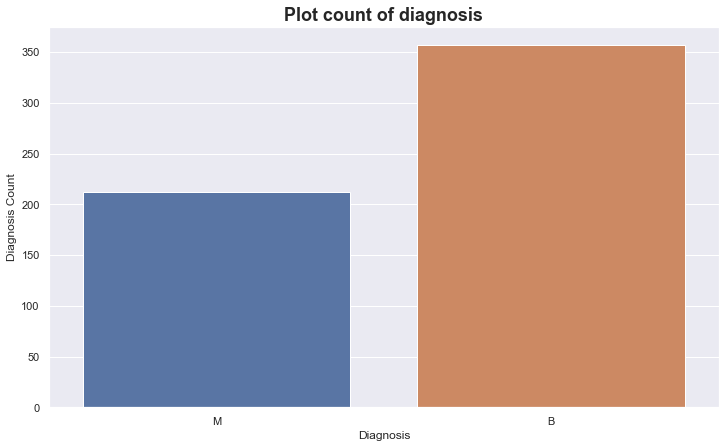

In [55]:
vs.plot_count(df, 'diagnosis', "Diagnosis", "Diagnosis Count")

### Graphical Univariate Analysis

For the graphical univariate analysis we will use only the numerical columns excluding id.

In [57]:
y = df.diagnosis # M or B
x = df.drop(['id', 'diagnosis'], axis=1)

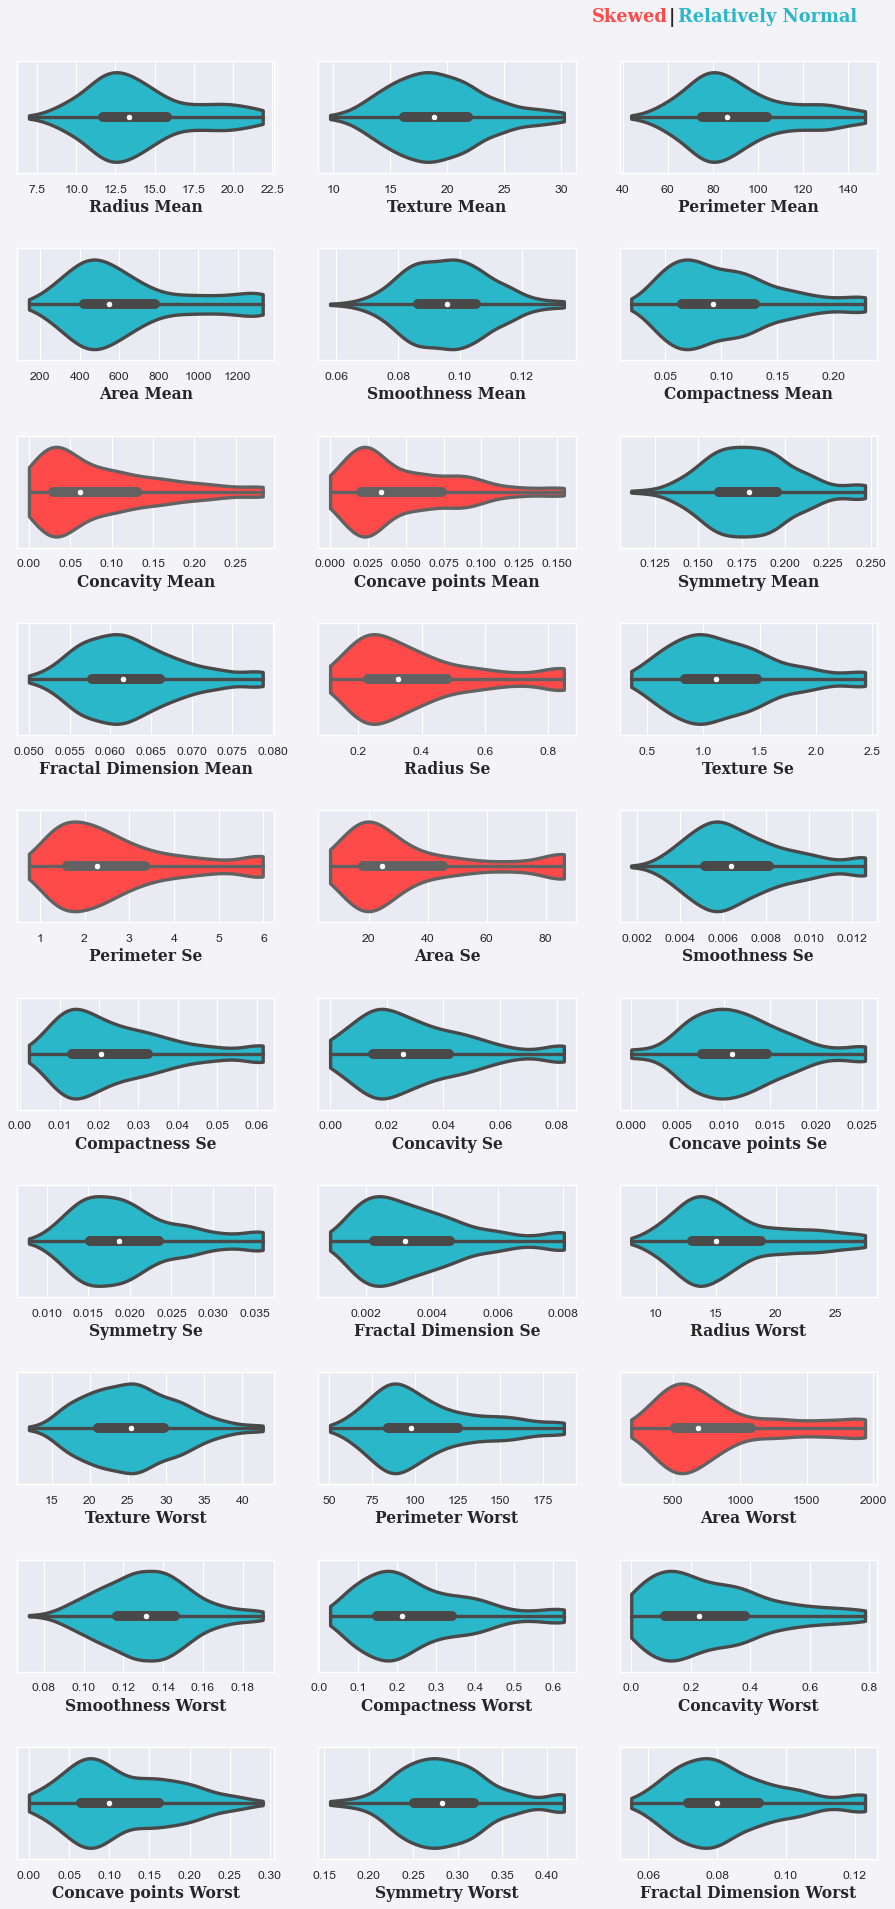

In [64]:
from scipy.stats import kurtosis, skew
colors= ['#fe4a49' ,'#2ab7ca' ,'#fed766' ,'#e6e6ea' ,'#f4f4f8']
fig,ax = plt.subplots(nrows = 10, ncols = 3, figsize = (12,24),dpi=80)
axes = ax.ravel()

for col,ax in zip(x.columns,axes):
    
    # skewness
    if skew(x[col])>1:
        color = colors[0]
    else:
        color = colors[1]
    
    ## plots
    sns.violinplot(x[col], ax =ax,
                   color = color, cut =0,
                   inner = 'box',
                   alpha = 1,linewidth = 3, edgecolor = 'solidblack', saturation =1 )
    
    ## plot setting
    xlabel = ' '.join([value.capitalize() for value in str(col).split('_') ])
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xlabel(xlabel,{'font':'serif','size':14, 'weight':'bold'}, alpha = 1)

plt.tight_layout(pad= 3,h_pad = 2.5, w_pad = 2.5)

fig.text(0.65,1, "Skewed",{'font':'serif','size':16, 'weight':'bold', 'color':colors[0]})
fig.text(0.73,1, '|',{'font':'serif','size':16, 'weight':'bold'})
fig.text(0.74,1, "Relatively Normal",{'font':'serif','size':16, 'weight':'bold','color':colors[1]})

fig.show()

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

In [65]:
normal_x = helper.custome_normalizer(x)

In [ ]:
mean_df = normal_x.iloc[:, 0:10]
se_df = normal_x.iloc[:, 10:20]
worest_df = normal_x.iloc[:, 20:30]

print("Mean dataframe")
display(mean_df.head())

print("satandar err dataframe")
display(se_df.head())

print("Worest dataframe")
display(worest_df.head())

# mean_df_dia = mean_df.copy()
# mean_df_dia['diagnosis'] = cleaned_df['diagnosis']

In [ ]:
print("Describe Mean")
display(mean_df.describe().T)
mean_df_dia = mean_df.copy()
mean_df_dia['diagnosis'] = y
sns.pairplot(mean_df_dia, hue="diagnosis")


In [ ]:
print("Describe SE")
display(se_df.describe().T)

se_df_dia = se_df.copy()
se_df_dia['diagnosis'] = y
sns.pairplot(se_df_dia, hue="diagnosis")

In [ ]:
print("Describe worest")
display(worest_df.describe().T)

worest_df_dia = se_df.copy()
worest_df_dia['diagnosis'] = y
sns.pairplot(worest_df_dia, hue="diagnosis")


In [ ]:
def multi_histogram(_df: pd.DataFrame, target_col, target_col_name: str):
    ind = 0
    cols = _df.columns

    fig, axs = plt.subplots(len(cols), figsize=(25,45))
    
    merged_df = _df.copy()
    merged_df[target_col_name] = target_col

    for col in cols:    
            sns.histplot(merged_df, 
                         x=col, 
                         hue=target_col_name, element="poly", 
                         stat="count", 
                         palette=["#7158e2", "#32ff7e"],
                         ax=axs[ind])
            ind += 1

In [ ]:
multi_histogram(mean_df, y, "diagnosis")

In [ ]:
multi_histogram(se_df, y, "diagnosis", )

In [ ]:
multi_histogram(worest_df, y, "diagnosis", )

In [ ]:
vs.violinplot(normal_x, y, 0, 10)


In [ ]:
vs.violinplot(normal_x, y, 10, 20)


In [ ]:
vs.violinplot(normal_x, y, 21, 30)


In [ ]:
vs.boxplot(normal_x, y, 0, 10)

In [ ]:
vs.swarmplot(normal_x, y, 0, 10)


In [ ]:
vs.swarmplot(normal_x, y, 11, 21)


In [ ]:
vs.swarmplot(normal_x, y, 21, 30)


In [ ]:
vs.plot_correlation(x)


In [ ]:
vs.pairplot(x, y, ['radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst'])


In [ ]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
         'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
         'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
         'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
         'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis', 'radius_worst', 'texture_worst',
         'perimeter_worst', 'area_worst', 'smoothness_worst',
         'compactness_worst', 'concavity_worst', 'concave points_worst',
         'symmetry_worst', 'fractal_dimension_worst']